코랩 한글 설정 코드

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (17.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123105 files and dir

In [ ]:
# 자동으로 런타임이 끊어지는 코드입니다.
# 당황하지 마세요.
import os
os.kill(os.getpid(), 9)

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)

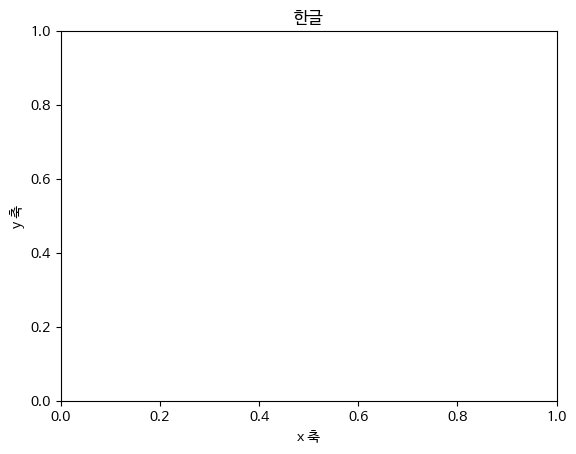

In [ ]:
plt.title('한글')
plt.xlabel('x 축')
plt.ylabel('y 축')
plt.show()

# 국가 대륙별 상품군별 온라인쇼핑 해외직접판매액 분석

URL: https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

필요 라이브러리 호출
- 분석에 필요한 라이브러리
- 시각화에 필요한 라이브러리
- 시각화 폰트 및 깨짐현상 방지 코드

In [ ]:
# 필요 라이브러리
import pandas as pd
import numpy as np

###  코랩 마운트 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 필요 데이터 : 00_dataset 폴더의 데이터 '온라인쇼핑_해외직접판매액' 파일을 다운받아서 colab 혹은 구글 클라우드에 업로드해 주세요.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/(과제) 3-(2)_국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20230307161020.csv',
                   sep = ',', encoding = 'euc-kr')
# data.columns = ['user id', 'item id', 'rating', 'timestamp']
# data
print(data.shape)
data.head(5)

(450, 39)


,국가(대륙)별,상품군별,판매유형별,2014.1/4,2014.2/4,2014.3/4,2014.4/4,2015.1/4,2015.2/4,2015.3/4,...,2020.3/4,2020.4/4,2021.1/4,2021.2/4,2021.3/4,2021.4/4,2022.1/4,2022.2/4,2022.3/4,2022.4/4 p)
0,합계,합계,계,148272,153641,163999,213216,269101,271784,268421,...,1656729,1525174,1206923,1222986,1034913,926718,567581,505954,415148,353040
1,합계,합계,면세점,-,-,-,-,-,-,-,...,1410967,1247495,972384,974415,795824,681168,363520,300602,211640,152113
2,합계,합계,면세점 이외,-,-,-,-,-,-,-,...,245762,277679,234539,248571,239089,245550,204061,205352,203508,200927
3,합계,컴퓨터 및 주변기기,계,4915,4052,3912,3529,2903,2697,3804,...,7722,3589,4239,4450,3612,2707,2449,2867,2824,3028
4,합계,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,3497,0,0,0,0,0,0,0,0,0


## 분석 시각화를 위한 데이터프레임 변형 (Pandas Melt)
https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [ ]:
#원래 이부분도 과제였지만 배우지 않은 부분인데 어려워서 답을 알려드립다.
#위에 링크에 들어가서 한번 읽어보세요.

data = data.melt(id_vars = ['국가(대륙)별','상품군별','판매유형별'])
data = data.rename(columns = {'variable' : '기간', 'value' : '판매금액(백만원)'})

print(data.shape)
data.head()

(16200, 5)


,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원)
0,합계,합계,계,2014.1/4,148272
1,합계,합계,면세점,2014.1/4,-
2,합계,합계,면세점 이외,2014.1/4,-
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16200 entries, 0 to 16199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   국가(대륙)별    16200 non-null  object
 1   상품군별       16200 non-null  object
 2   판매유형별      16200 non-null  object
 3   기간         16200 non-null  object
 4   판매금액(백만원)  16200 non-null  object
dtypes: object(5)
memory usage: 632.9+ KB


# 데이터 전처리

1) 기간에서 연도를 분리하기

In [ ]:
data['연도'] = data['기간']
data['연도'] = data['연도'].str.split('.').str[0]
data.head()

,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원),연도
0,합계,합계,계,2014.1/4,148272,2014
1,합계,합계,면세점,2014.1/4,-,2014
2,합계,합계,면세점 이외,2014.1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-,2014


2) 기간에서 분기를 분리하기

In [ ]:
data['분기'] = data['기간']
data['분기'] = data['분기'].str.split('/').str[-2]
data['분기'] = data['분기'].str.split('.').str[-1]
data.head()

,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원),연도,분기
0,합계,합계,계,2014.1/4,148272,2014,1
1,합계,합계,면세점,2014.1/4,-,2014,1
2,합계,합계,면세점 이외,2014.1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-,2014,1


3) 금액을 수치 데이터로 변경

In [ ]:
data['판매금액(백만원)'] = data['판매금액(백만원)'].replace('-', np.NaN)
data['판매금액(백만원)'] = pd.to_numeric(data['판매금액(백만원)'])
data.head()
# data.tail()

,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원),연도,분기
0,합계,합계,계,2014.1/4,148272.0,2014,1
1,합계,합계,면세점,2014.1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014.1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1


In [ ]:
print(data.shape)
data.info()

(16200, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16200 entries, 0 to 16199
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   국가(대륙)별    16200 non-null  object 
 1   상품군별       16200 non-null  object 
 2   판매유형별      16200 non-null  object 
 3   기간         16200 non-null  object 
 4   판매금액(백만원)  12600 non-null  float64
 5   연도         16200 non-null  object 
 6   분기         16200 non-null  object 
dtypes: float64(1), object(6)
memory usage: 886.1+ KB


4) 국가 대륙별 합계와 상품군별 합계는 따로 구할 수 있기 때문에 제거하는 것이 필요해요

In [ ]:
# 국가대륙별 합계 제거
data_dr = data
idx = data_dr[data_dr['국가(대륙)별'] == '합계'].index

data_dr = data_dr.drop(idx)
# data
# print(data.shape)

# # 상품군별 합계 제거
idx2 = data_dr[data_dr['상품군별'] == '합계'].index
data_dr = data_dr.drop(idx2)
# data
print(data_dr.shape)

data_dr.head()

(13608, 7)


,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원),연도,분기
48,미국,컴퓨터 및 주변기기,계,2014.1/4,2216.0,2014,1
49,미국,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014.1/4,NaN,2014,1
51,미국,가전·전자·통신기기,계,2014.1/4,2875.0,2014,1
52,미국,가전·전자·통신기기,면세점,2014.1/4,NaN,2014,1


# 연도별 판매액 시각화

Q1. 판매유형별 == '계' 데이터를 추출해보자.(df_total로 변수 저장)

In [ ]:
data_total = data_dr[data_dr['판매유형별'] == '계']
print(data_total.shape)

(4536, 7)


In [ ]:
data_total

,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원),연도,분기
48,미국,컴퓨터 및 주변기기,계,2014.1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014.1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014.1/4,47.0,2014,1
57,미국,서 적,계,2014.1/4,962.0,2014,1
60,미국,사무·문구,계,2014.1/4,25.0,2014,1
...,...,...,...,...,...,...,...
16185,기타,아동·유아용품,계,2022.4/4 p),484.0,2022,4
16188,기타,음·식료품,계,2022.4/4 p),22.0,2022,4
16191,기타,농축수산물,계,2022.4/4 p),0.0,2022,4
16194,기타,생활용품 및 자동차용품,계,2022.4/4 p),61.0,2022,4


Q2. 연도별, 판매액(백만원)에 대한 Line Plot을 그려보자.

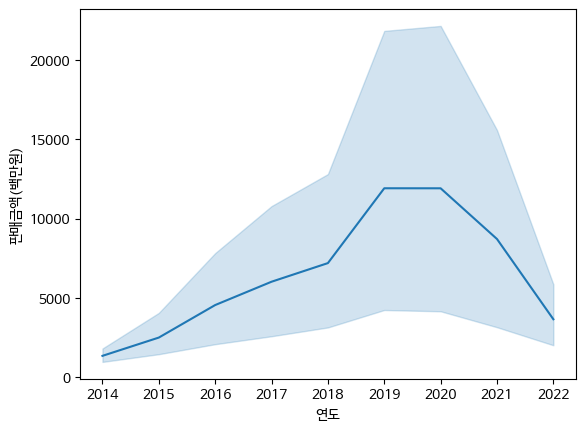

In [ ]:
import plotly.express as px
import seaborn as sns
sns.lineplot(data_total, x='연도', y='판매금액(백만원)')
plt.show()

# ploty 고민해 보기...
# import plotly.express as px

# fig = px.line(data, x="연도", y="판매금액(백만원)")
# fig.show()

In [ ]:
# 연도별, 판매액(백만원)의 평균을 구해보세요
data_total_year_won = data_total[['연도', '판매금액(백만원)']]
temp = data_total_year_won.groupby('연도').mean()
temp = temp.reset_index()
temp

,연도,판매금액(백만원)
0,2014,1347.476190
1,2015,2499.750000
2,2016,4550.357143
3,2017,6021.099206
4,2018,7195.482143
5,2019,11913.904762
6,2020,11911.601190
7,2021,8713.373016
8,2022,3654.212302


In [ ]:
import plotly.express as px

fig = px.line(temp, x="연도", y="판매금액(백만원)")
fig.show()

Q3. 상품군별 연도별, 판매액에 대한 Line Plot을 그려보자.

In [ ]:
data_total_pyw = data_total[['상품군별', '연도', '판매금액(백만원)']]
data_total_pyw

,상품군별,연도,판매금액(백만원)
48,컴퓨터 및 주변기기,2014,2216.0
51,가전·전자·통신기기,2014,2875.0
54,소프트웨어,2014,47.0
57,서 적,2014,962.0
60,사무·문구,2014,25.0
...,...,...,...
16185,아동·유아용품,2022,484.0
16188,음·식료품,2022,22.0
16191,농축수산물,2022,0.0
16194,생활용품 및 자동차용품,2022,61.0


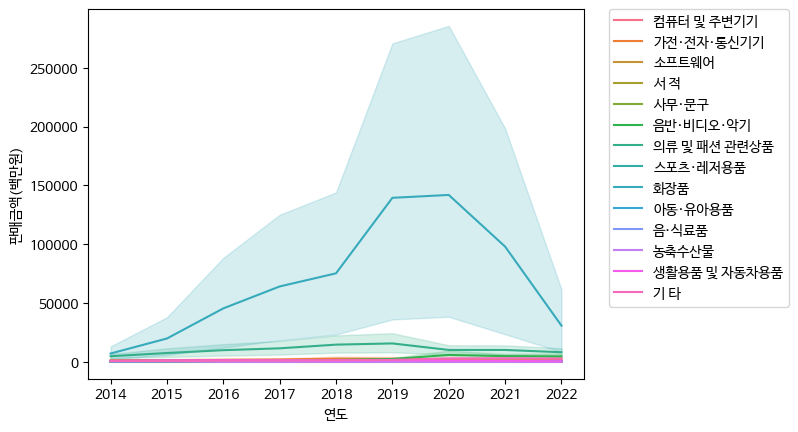

In [ ]:
# plotly
# import plotly.express as px
# fig = px.line(data_total_pro_year_won, x='연도', y='판매금액(백만원)', color='상품군별')
# fig.show()

#seaborn
import seaborn as sns
sns.lineplot(data_total_pyw, x='연도', y='판매금액(백만원)', hue='상품군별')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.) # 1.05 밖에 표시
plt.show()

Q4. 상품군별로 평균 판매금액을 내림차순으로 출력하세요.

In [ ]:
dt_pw_mean = data_total_pyw.drop(['연도'], axis=1)
dt_pw_mean = dt_pw_mean.groupby('상품군별').mean()
dt_pw_mean = dt_pw_mean.reset_index()
dt_pw_mean

dt_pw_mean.sort_values(by = '판매금액(백만원)', axis=0, ascending = False)

,상품군별,판매금액(백만원)
13,화장품,69125.484568
11,의류 및 패션 관련상품,10326.327160
10,음반·비디오·악기,2517.762346
0,가전·전자·통신기기,1889.345679
1,기 타,1765.820988
4,생활용품 및 자동차용품,1094.574074
9,음·식료품,897.274691
5,서 적,622.765432
8,아동·유아용품,482.623457
7,스포츠·레저용품,440.660494


# 화장품의 온라인 쇼핑 직접 판매액

Q5. df_total 변수에서 상품군별 == '화장품' 데이터를 df_cosmetic 변수에 저장해보자.

In [ ]:
df_cosmetic = data_total[data_total['상품군별'] == '화장품']
df_cosmetic

,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원),연도,분기
72,미국,화장품,계,2014.1/4,3740.0,2014,1
117,중국,화장품,계,2014.1/4,32235.0,2014,1
162,일본,화장품,계,2014.1/4,1034.0,2014,1
207,아세안(ASEAN),화장품,계,2014.1/4,398.0,2014,1
252,유럽연합(EU),화장품,계,2014.1/4,937.0,2014,1
...,...,...,...,...,...,...,...
16002,유럽연합(EU),화장품,계,2022.4/4 p),303.0,2022,4
16047,중동,화장품,계,2022.4/4 p),200.0,2022,4
16092,중남미,화장품,계,2022.4/4 p),31.0,2022,4
16137,대양주,화장품,계,2022.4/4 p),52.0,2022,4


Q6. 화장품 판매액에 대한 기간별 금액 데이터 시각화

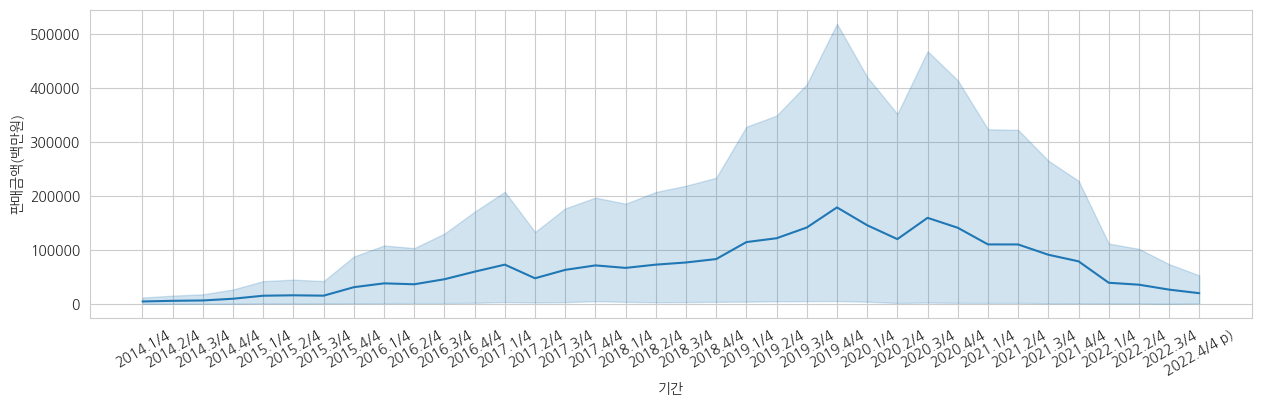

In [ ]:
# import plotly.express as px

# fig = px.line(df_cosmetic, x="기간", y="판매금액(백만원)")
# fig.show()

import seaborn as sns
plt.figure(figsize = (15,4))
sns.lineplot(df_cosmetic, x='기간', y='판매금액(백만원)')
sns.set_style('whitegrid')
plt.xticks(rotation = 30)
# plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.) # 1.05 밖에 표시
plt.show()

Q7. 국가 대륙별로 다른 색상으로 표현해보기.
- 2015년의 국가별 화장품 매출

In [ ]:
dc_y = df_cosmetic[df_cosmetic['연도'] == '2015']
dc_y

,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원),연도,분기
1872,미국,화장품,계,2015.1/4,11223.0,2015,1
1917,중국,화장품,계,2015.1/4,119497.0,2015,1
1962,일본,화장품,계,2015.1/4,874.0,2015,1
2007,아세안(ASEAN),화장품,계,2015.1/4,1452.0,2015,1
2052,유럽연합(EU),화장품,계,2015.1/4,852.0,2015,1
2097,중동,화장품,계,2015.1/4,572.0,2015,1
2142,중남미,화장품,계,2015.1/4,389.0,2015,1
2187,대양주,화장품,계,2015.1/4,627.0,2015,1
2232,기타,화장품,계,2015.1/4,6280.0,2015,1
2322,미국,화장품,계,2015.2/4,6176.0,2015,2


In [ ]:
dc_y = df_cosmetic[df_cosmetic['연도'] == '2015']
# dc_y_g = dc_y.groupby('국가(대륙)별').mean()
# dc_y_g = dc_y.groupby('국가(대륙)별')['판매금액(백만원)'].mean()
# dc_y_g.to_frame()
dc_y_g = dc_y.groupby('국가(대륙)별')[['판매금액(백만원)']].sum()
dc_y_g = dc_y_g.reset_index()
dc_y_g
# type(dc_y_g)

,국가(대륙)별,판매금액(백만원)
0,기타,34700.0
1,대양주,2634.0
2,미국,32951.0
3,아세안(ASEAN),5065.0
4,유럽연합(EU),4858.0
5,일본,6600.0
6,중국,625774.0
7,중남미,1592.0
8,중동,2312.0


- 막대그래프로 시각화해보세요

In [ ]:
import plotly.express as px

fig = px.bar(dc_y, x='국가(대륙)별', y='판매금액(백만원)')
fig.show()

- 상자그림으로 시각화해보세요

In [ ]:
import plotly.express as px

fig = px.box(dc_y, x='국가(대륙)별', y='판매금액(백만원)')

fig.show()

# import seaborn as sns
# sns.set_theme(style="ticks", palette="pastel")

# sns.boxplot(x="국가(대륙)별", y="판매금액(백만원)",
#             palette=["m", "g"], data=dc_y_g)
# sns.despine(offset=10, trim=True)

Q8. 중국을 제외하고 국가별로 다른 색상으로 표현하기.

In [ ]:
dc_y_c = dc_y[dc_y['국가(대륙)별'] != '중국']

# plt.figure(figsize = (15,4))
# sns.set_theme(style="ticks", palette="pastel")

# sns.boxplot(x="국가(대륙)별", y="판매금액(백만원)", data=dc_y_c)
# plt.show()

fig = px.box(dc_y_c, x='국가(대륙)별', y='판매금액(백만원)')

fig.show()

Q9. 판매유형별 화장품 판매액에 대한 기간별 금액 데이터를 시각화하기(Line plot)

In [ ]:
df_sub = data_dr[(data_dr['판매유형별'] != '계') & (data_dr['상품군별'] == '화장품')]
df_sub

,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원),연도,분기
73,미국,화장품,면세점,2014.1/4,NaN,2014,1
74,미국,화장품,면세점 이외,2014.1/4,NaN,2014,1
118,중국,화장품,면세점,2014.1/4,NaN,2014,1
119,중국,화장품,면세점 이외,2014.1/4,NaN,2014,1
163,일본,화장품,면세점,2014.1/4,NaN,2014,1
...,...,...,...,...,...,...,...
16094,중남미,화장품,면세점 이외,2022.4/4 p),31.0,2022,4
16138,대양주,화장품,면세점,2022.4/4 p),2.0,2022,4
16139,대양주,화장품,면세점 이외,2022.4/4 p),50.0,2022,4
16183,기타,화장품,면세점,2022.4/4 p),41.0,2022,4


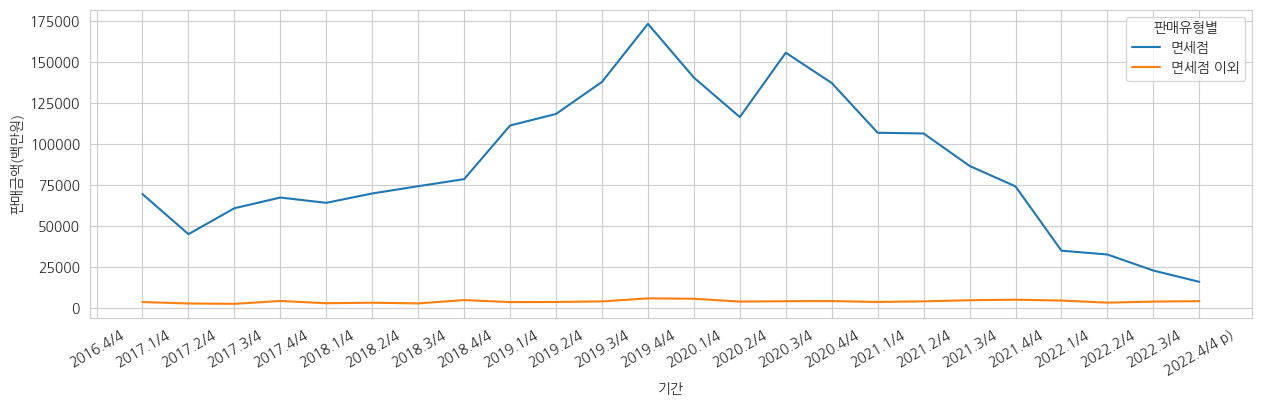

In [ ]:
plt.figure(figsize = (15,4))
# sns.set_theme(style="darkgrid")
sns.lineplot(x="기간", y="판매금액(백만원)", hue="판매유형별", data=df_sub,
             errorbar = None)
# plt.rc('font', family='NanumGothic')
plt.xticks(rotation = 30)
plt.show()

# import plotly.express as px

# fig = px.line(df_sub, x="기간", y="판매금액(백만원)", color="판매유형별")
# fig.update_xaxes(range=[, 3])
# # fig.update_traces(textposition="bottom right")
# fig.show()

Q10. 면세점 이외의 데이터들도 증가 했는지 확인해보기

In [ ]:
df_sub_etc = df_sub[df_sub['판매유형별'] == '면세점 이외']
df_sub_etc

,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원),연도,분기
74,미국,화장품,면세점 이외,2014.1/4,NaN,2014,1
119,중국,화장품,면세점 이외,2014.1/4,NaN,2014,1
164,일본,화장품,면세점 이외,2014.1/4,NaN,2014,1
209,아세안(ASEAN),화장품,면세점 이외,2014.1/4,NaN,2014,1
254,유럽연합(EU),화장품,면세점 이외,2014.1/4,NaN,2014,1
...,...,...,...,...,...,...,...
16004,유럽연합(EU),화장품,면세점 이외,2022.4/4 p),292.0,2022,4
16049,중동,화장품,면세점 이외,2022.4/4 p),200.0,2022,4
16094,중남미,화장품,면세점 이외,2022.4/4 p),31.0,2022,4
16139,대양주,화장품,면세점 이외,2022.4/4 p),50.0,2022,4


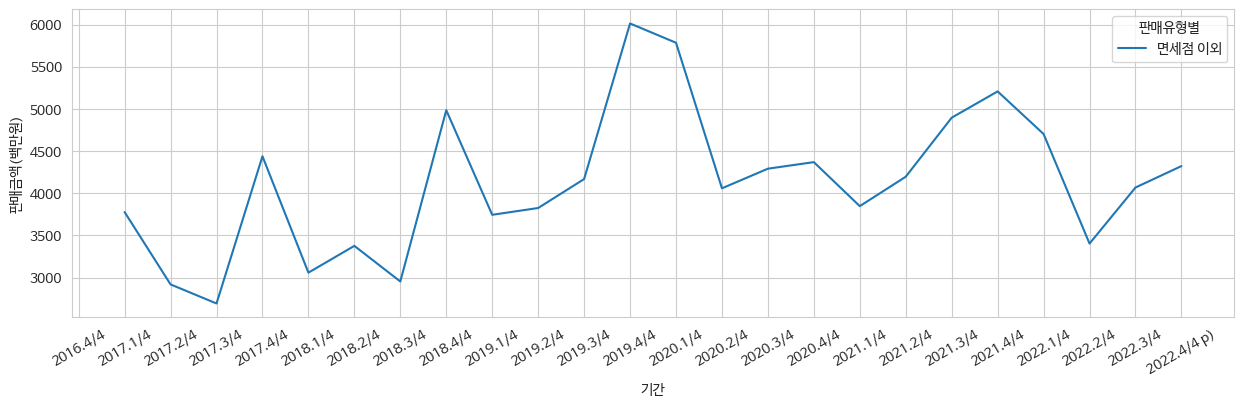

In [ ]:
plt.figure(figsize = (15,4))
# sns.set_theme(style="darkgrid")
sns.lineplot(x="기간", y="판매금액(백만원)", hue=("판매유형별"), data=df_sub_etc,
             errorbar = None)
# plt.rc('font', family='NanumBarunGothic')
plt.xticks(rotation = 30)
plt.show()

Q12. 국가별 기간에 따른 금액 데이터 시각화

In [ ]:
data_dr_total = data_dr[(data_dr['판매유형별'] == '계') & (data_dr['상품군별'] == '의류 및 패션 관련상품')]
data_dr_total

,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원),연도,분기
66,미국,의류 및 패션 관련상품,계,2014.1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014.1/4,12206.0,2014,1
156,일본,의류 및 패션 관련상품,계,2014.1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션 관련상품,계,2014.1/4,3473.0,2014,1
246,유럽연합(EU),의류 및 패션 관련상품,계,2014.1/4,1364.0,2014,1
...,...,...,...,...,...,...,...
15996,유럽연합(EU),의류 및 패션 관련상품,계,2022.4/4 p),1256.0,2022,4
16041,중동,의류 및 패션 관련상품,계,2022.4/4 p),125.0,2022,4
16086,중남미,의류 및 패션 관련상품,계,2022.4/4 p),24.0,2022,4
16131,대양주,의류 및 패션 관련상품,계,2022.4/4 p),1155.0,2022,4


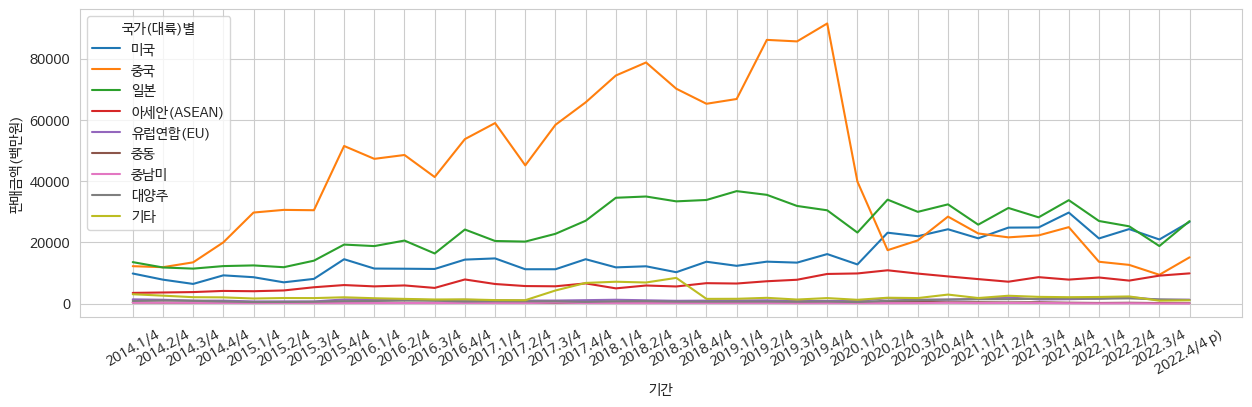

In [ ]:
# import plotly.express as px

# fig = px.line(data_dr, x="기간", y="판매금액(백만원)", color='국가(대륙)별')
# fig.show()

plt.figure(figsize = (15,4))
# sns.set_theme(style="darkgrid")
sns.lineplot(x="기간", y="판매금액(백만원)", hue=("국가(대륙)별"), data=data_dr_total,
             errorbar = None)
plt.rc('font', family='NanumBarunGothic')
plt.xticks(rotation = 30)

# plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.) # 1.05 밖에 표시
plt.show()

Q13. 국가대륙별, 연도별 합계 금액을 Pivot_table을 통해 구하기

In [ ]:
data_dr_total_pi = data_dr_total.pivot_table(index = '국가(대륙)별', columns='연도',
                                             values = '판매금액(백만원)', aggfunc=np.sum)
data_dr_total_pi

연도,2014,2015,2016,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,,,,
기타,9683.0,7248.0,5918.0,13192.0,23901.0,6475.0,7807.0,8578.0,6409.0
대양주,3392.0,2349.0,3401.0,2716.0,2725.0,2489.0,3749.0,6023.0,5759.0
미국,33223.0,38066.0,48451.0,51638.0,47875.0,55536.0,82207.0,100721.0,93222.0
아세안(ASEAN),14936.0,19639.0,24478.0,24297.0,23068.0,31247.0,39339.0,31549.0,34966.0
유럽연합(EU),4485.0,3374.0,4899.0,4091.0,4114.0,3694.0,5128.0,6225.0,6174.0
일본,48960.0,57594.0,79905.0,90531.0,136800.0,134637.0,119531.0,118967.0,97945.0
중국,57531.0,142339.0,190932.0,228330.0,288848.0,330267.0,106346.0,91770.0,50767.0
중남미,975.0,616.0,649.0,772.0,576.0,544.0,614.0,611.0,170.0
중동,1172.0,1018.0,968.0,808.0,879.0,951.0,1776.0,1462.0,713.0


Q14. Heatmap을 통해 연도별, 국가별 합계 금액을 시각적으로 표현하기

In [ ]:
import plotly.express as px

fig = px.imshow(data_dr_total_pi, text_auto=True,
                color_continuous_scale='emrld')

fig.show()